<a href="https://colab.research.google.com/github/goginyanboris/VKR/blob/scripts_to_compare/PSNR_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
#drive.flush_and_unmount()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Функции и метрики

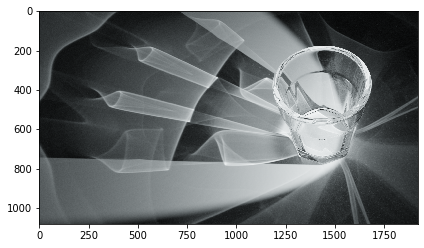

In [0]:
import numpy as np 
import math, os

import cv2
#import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from skimage import exposure, color, metrics
from skimage.io import imread, imshow, imsave


# метод нормализации яркости изображения
def hisEqulColor(img):
    ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels,ycrcb)
    #cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
    return img


'''
def l1(img):  # сумма эл столбцов
  #img = img1 - img2
  summ = [0 for i in range(len(img[0]))]
  maxbgr = []
  for k in range (3): # BGR
    for j in range(len(img[0])): # длина
      summ[j] = sum(abs(img[:,j][k]))
    # print(len(img[0]))
    maxbgr.append(max(summ))
  return maxbgr

def lmax(img):  # сумма эл строк
  #img = img1 - img2
  summ = [0 for i in range(len(img))]
  maxbgr = []
  for k in range (3): # BGR
    for i in range(len(img)): # ширина
      summ[i] = sum(abs(img[i,:][k]))
    # print(len(img))
    maxbgr.append(max(summ))
  return maxbgr

  # запись в таблицу результатов сравнения
k=0
i = 0
for img in A0_images:
  img = hisEqulColor(img)
  img_table.loc[k]= ["A", "appleseed", A0_times[i], measure.compare_psnr(Aimg, img, data_range=None)]
  i+=1
  k+=1

i = 0
for img in A1_images:
  img = hisEqulColor(img)
  img_table.loc[k]= ["A", "cycles", A1_times[i], measure.compare_psnr(Aimg, img, data_range=None)]
  i+=1
  k+=1

i = 0
for img in A3_images:
  img = hisEqulColor(img)
  img_table.loc[k]= ["A", "luxcore", A3_times[i], measure.compare_psnr(Aimg, img, data_range=None)]
  i+=1
  k+=1

# img_table '''



##Условные обозначения

>0 - appleseed \\
1 - Cycles \\
2 - LuxCore \\



##A_Glass
###A0_appleseed

In [0]:
img_table = pd.DataFrame({
    'scene number':[],
    'render name': [],
    'rendering time (sec)':[],
    'psnr (dB)':[],
})

Aetalon = imread("/content/drive/My Drive/Диплом/A Glass/A0_appleseed/old/A0_17685.png")
Aetalon = hisEqulColor(Aetalon)

# A0 appleseed 6 treads 
A0_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_25_samp_282.534_seconds_var=0.007767.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_52_samp_551.179_sec_var=3.29532.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_156_samp_1519.7081_sec_var=10.995.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_370_samp3337.4497_sec_var= 166.618.png"]] 
                             #    "/content/drive/My Drive/Диплом/A Glass/0 Appleseed_sppm/A0_11952.437.png"]] 

A0_6treadsTimes = [282.534, 551.179, 1519.7081, 3337.4497]

# A0 appleseed 12 treads

A0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_25_samp_187.660_sec_var=0.1818.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_52_samp_371.166_sec_var=.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_156_samp_ 1033.1634_sec_var=4.565.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_600samp_2304.6446356773376 var= 0.21412804828711765.png"]] # 370 samples

A0_12treadsTimes = [187.660, 371.166, 1033.1634, 2304.6446]

# -----------------------------------------------------------------------------------------------------------
#
# A1 Cycles 6 treads
'''
A1_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", 
                                ]]

A1_6treadsTimes = []

# A1 Cycles 12 treads
A1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", 
                                ]]

A1_12treadsTimes = []

# -----------------------------------------------------------------------------------------------------------
#
# A2 Luxcore 6 treads

A2_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", 
                                ]]

A2_6treadsTimes = []

# A2 Luxcore 12 treads

A1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", 
                                ]]

A1_12treadsTimes = []

# skimage.metrics.peak_signal_noise_ratio(image_true, image_test, *, data_range=None) '''



'\nA1_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", \n                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", \n                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", \n                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", \n                                ]]\n\nA1_6treadsTimes = []\n\n# A1 Cycles 12 treads\nA1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", \n                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", \n                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", \n                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.

None


In [0]:

A0_6psnr = []
for img in A0_6treads:
    img = hisEqulColor(img)
    A0_6psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))

A0_12psnr = []
for img in A0_12treads:
    img = hisEqulColor(img)
    A0_12psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))  

A0_6_12_proc = []
for i in range(len(A0_6psnr)):
    A0_6_12_proc.append(A0_12treadsTimes[i] /A0_6treadsTimes[i] * 100 )

plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

#ax.plot(A0_6treadsTimes, A0_6psnr, color = 'r', label="6 treads")
#ax.plot(A0_12treadsTimes, A0_12psnr, color = 'orange', label="12 treads")
ax.plot(A0_12treadsTimes, A0_6_12_proc, color = 'orange', label="12/6 times")
plt.legend()
#ax.set(title='psnr')
ax.set(title='procent')

plt.xlabel("seconds\nРисунок 2. Зависимость качества и скорости appleseed от кол-ва потоков в %")

ax.tick_params(axis = 'x',    #  Пвисимрименяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей

#plt.xticks(np.sort(A0_6treadsTimes + A0_12treadsTimes))
plt.xticks(A0_6treadsTimes)
#plt.ylabel("dB")
plt.ylabel("%")
#plt.yticks(np.sort(A0_6psnr + A0_12psnr))
plt.yticks(A0_6_12_proc)
#ax.yaxis.set_major_locator(ticker.IndexLocator(0, ))
plt.grid()
print(A0_6_12_proc)
plt.show()

# Сцена В

In [0]:

Betalon = imread("/content/drive/My Drive/Диплом/B_Bottles/B_etalon.png")
Betalon = hisEqulColor(Betalon)

# A0 appleseed 6 treads 
B0_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_7__6tr_662.2328.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_14_6tr_1303.457.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_27__6tr_2525.39.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_54__6tr_5091.939.png"]] 
                             #    "/content/drive/My Drive/Диплом/A Glass/0 Appleseed_sppm/A0_11952.437.png"]] 

B0_6treadsTimes = [662.232, 1303.457, 2525.39, 5091.939]

# B0 appleseed 12 treads

B0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_7__12tr_420.4077.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_14_12tr_863.1535.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_27__12tr_ 1596.9861.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_54__12tr_3186.8176.png"]] # 370 samples

B0_12treadsTimes = [420.4077, 863.1535, 1596.9861, 3186.8176]

# -----------------------------------------------------------------------------------------------------------
#
# B1 Cycles 6 treads
'''
B1_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", 
                                ]]

B1_6treadsTimes = []

# A1 Cycles 12 treads
B1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.08.21.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.16.46.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_00.35.16.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/1 Cycles_path tracing/A1_01.08.33.png", 
                                ]]

B1_12treadsTimes = []
'''
# -----------------------------------------------------------------------------------------------------------
#
# B2 Luxcore 6 treads

B2_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_88_6tr_656.302.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_173_6tr_1365.769.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_335_6tr_2661.068.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_676_6tr5324.674.png", 
                                ]]

B2_6treadsTimes = [656.302, 1365.769, 2661.068, 5324.674]

# B2 Luxcore 12 treads

B2_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_88_12tr_421.0408.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_173_12tr_ 862.5259.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_335_12tr_1645.670.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_676_12tr_3291.636.png", 
                                ]]

B2_12treadsTimes = [421.04, 862.5259, 1645.670, 3291.636]

# skimage.metrics.peak_signal_noise_ratio(image_true, image_test, *, data_range=None) 



In [0]:

B0_6psnr = []
for img in B0_6treads:
    img = hisEqulColor(img)
    B0_6psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))

B0_12psnr = []
for img in B0_12treads:
    img = hisEqulColor(img)
    B0_12psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))  

B0_6_12_proc = []
for i in range(len(B0_6psnr)):
    B0_6_12_proc.append(B0_12treadsTimes[i] /B0_6treadsTimes[i] * 100 )

plt.figure(num=None, figsize=(8, 8), dpi=130, facecolor='w', edgecolor='k')
ax = plt.subplot()

#ax.plot(B0_6treadsTimes, B0_6psnr, color = 'r', label="appleseed")
#ax.plot(B0_12treadsTimes, B0_12psnr, color = 'orange', label="12 treads")
ax.plot(B0_12treadsTimes, B0_6_12_proc, color = 'orange', label="12/6 tr appleseed")

#ax.plot(B1_6treadsTimes, B1_6psnr, color = 'y', label="cycles")
#ax.plot(B1_12treadsTimes, B1_12psnr, color = 'orange', label="12 treads")
ax.plot(B1_12treadsTimes, B1_6_12_proc, color = 'orange', label="12/6 tr cycles")

#ax.plot(B2_6treadsTimes, B2_6psnr, color = 'royalblue', label="luxcore")
#ax.plot(B2_12treadsTimes, B2_12psnr, color = 'orange', label="12 treads")
ax.plot(B2_12treadsTimes, B2_6_12_proc, color = 'royalblue', label="12/6 tr luxcore")


plt.legend()
#ax.set(title='psnr')
ax.set(title='procent')

plt.xlabel("seconds\nРисунок 7. Зависимость качества и скорости appleseed от кол-ва потоков в %")
#plt.xlabel("seconds\nРисунок 10. Зависимость зашумленности от времени работы appleseed")

ax.tick_params(axis = 'x',    #  Пвисимрименяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей

#plt.xticks(np.sort(B0_6treadsTimes)) # + B0_12treadsTimes))
plt.xticks(B0_6treadsTimes)

#plt.yticks(np.sort(B0_6psnr))
plt.yticks(B0_6_12_proc)


#plt.ylabel("dB")
plt.ylabel("%")
plt.grid()
print(A0_6_12_proc)
plt.show()

In [0]:
img_table
img_table.to_excel("img_table.xlsx")


###Получение данных из таблицы img_table

In [0]:
m_time = img_table[img_table[img_table['scene number'] == "A"]['render'] == "appleseed"]['rendering time']
m_psnr = img_table[img_table[img_table['scene number'] == "A"]['render'] == "appleseed"]['psnr']

###Шаблон для рисования графика для appleseed

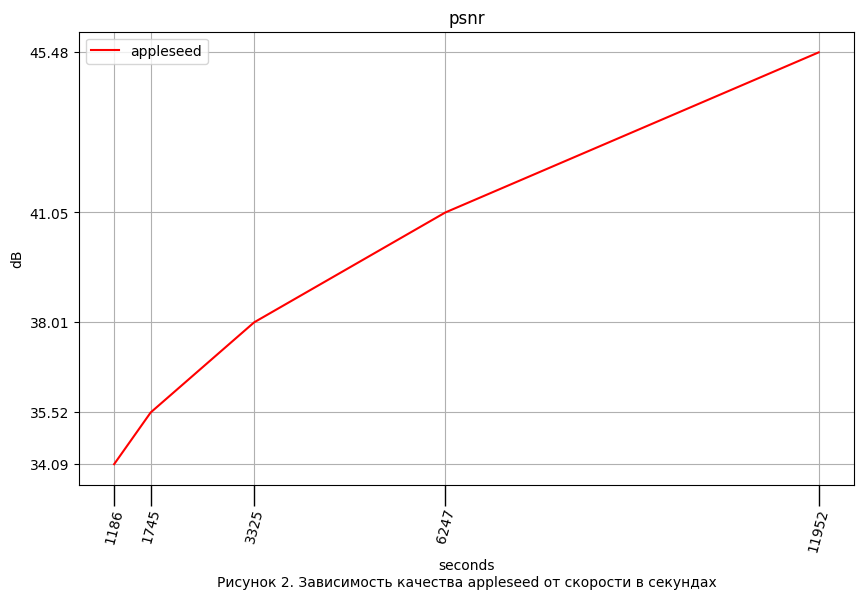

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.plot(m_time, m_psnr, color = 'r', label="appleseed")
plt.legend()
ax.set(title='psnr')

plt.xlabel("seconds\nРисунок 2. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Пвисимрименяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей

plt.xticks(m_time)
plt.ylabel("dB")
plt.yticks(m_psnr)
#ax.yaxis.set_major_locator(ticker.IndexLocator(0, ))
plt.grid()

plt.show()

###Шаблон для рисования графика для cycles

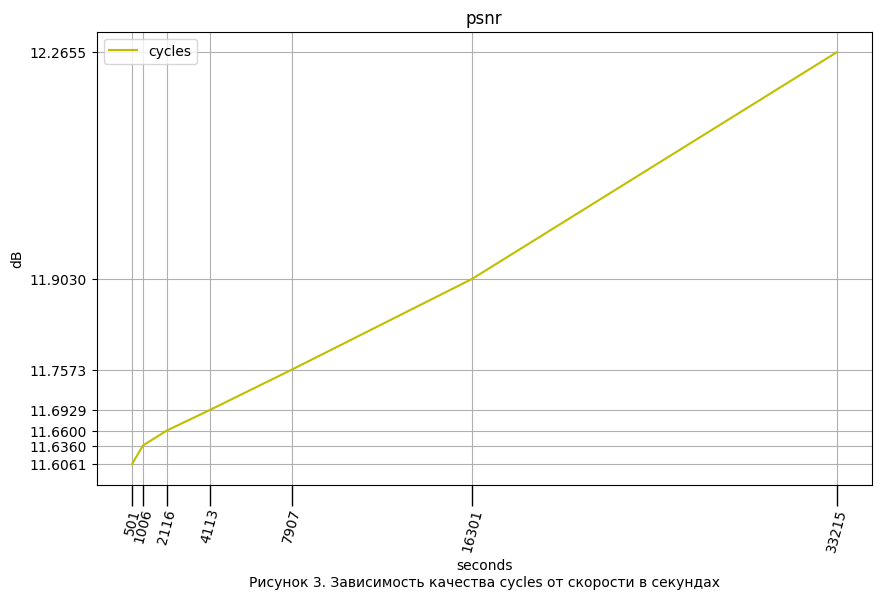

In [0]:
m_time = img_table[img_table[img_table['scene number'] == "A"]['render'] == "cycles"]['rendering time']
m_psnr = img_table[img_table[img_table['scene number'] == "A"]['render'] == "cycles"]['psnr']

plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.plot(m_time, m_psnr, color = 'y', label="cycles")
plt.legend()
ax.set(title='psnr')


plt.xlabel("seconds\nРисунок 3. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(m_time)
plt.ylabel("dB")
plt.yticks(m_psnr)
#ax.yaxis.set_major_locator(ticker.IndexLocator(0, ))
plt.grid()

plt.show()

#SSIM

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.set(title='ssim')
ax.plot(A1_times, A1_ssim, color = 'y', label="Cycles")
plt.legend()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длина делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 90)    #  Поворот подписей
ax.tick_params(axis = 'y', labelsize = 6, labelrotation = 10)    #  Поворот подписей

plt.xlabel("seconds")
plt.xticks(A1_times)
plt.ylabel("")
plt.yticks(A1_ssim)
plt.grid()
plt.show()

###Шаблон для рисования графика для luxcore

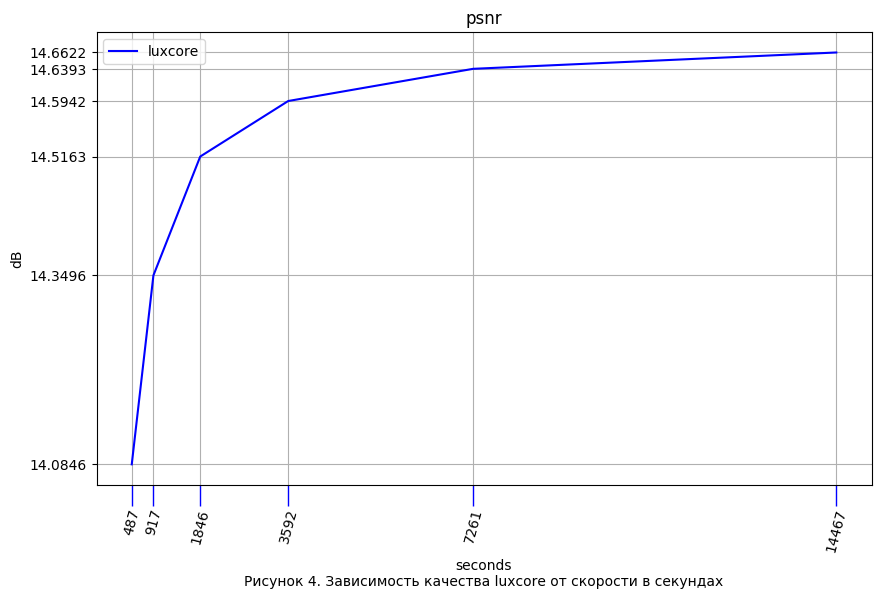

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(A3_times, A3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 4. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(A3_times)
plt.ylabel("dB")
plt.yticks(A3_psnr)
plt.grid()

plt.show()

#Общий график psnr

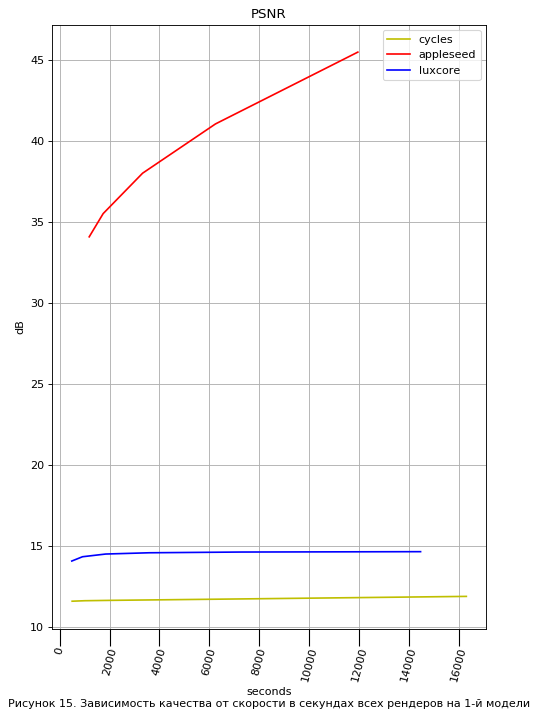

In [0]:



plt.figure(num=None, figsize=(7, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='PSNR')

ax.plot(A1_times[:-1], A1_psnr[:-1], color = 'y', label="cycles")
ax.plot(A0_times, A0_psnr, color = 'r', label="appleseed")
ax.plot(A3_times, A3_psnr, color = 'b', label="luxcore")
plt.legend()


plt.xlabel("seconds\nРисунок 15. Зависимость качества от скорости в секундах всех рендеров на 1-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(A3_times)
plt.ylabel("dB")
#plt.yticks(A3_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(4, 7), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(A1_times[:-1], A1_psnr[:-1], color = 'y', label="Cycles")
ax.plot(A2_times, A2_psnr, color = 'r', label="yafaray")
ax.plot(A3_times, A3_psnr, color = 'b', label="luxcore")
plt.legend()


plt.xlabel("seconds")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(A2_times)
plt.ylabel("dB")
#plt.yticks(A3_ssim)
plt.grid()

plt.show()

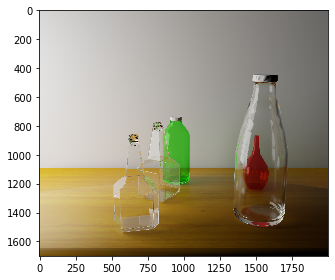

In [0]:
Bimg = imread("/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_ 14971.590.png")
Bimg = hisEqulColor(Bimg)
imshow(Bimg)

In [0]:
Bimg = imread("/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_ 14971.590.png")
Bimg = hisEqulColor(Bimg)
imshow(Bimg)

B0_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_1317.898.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_ 1741.154.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_2561.235.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_3611.974.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_5524.962.png",
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_7405.376.png",
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_10710.281.png"]]

B0_times = [1317.898, 1741.154, 2561.235, 3611.974, 5524.962, 7405.376, 10710.281]
B0_psnr=[]
B0_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in B0_images:
  img = hisEqulColor(img)
  B0_psnr.append(measure.compare_psnr(Bimg, img, data_range=None))
  #B0_ssim.append(measure.compare_ssim(Bimg, img, multichannel=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  app.launch_new_instance()


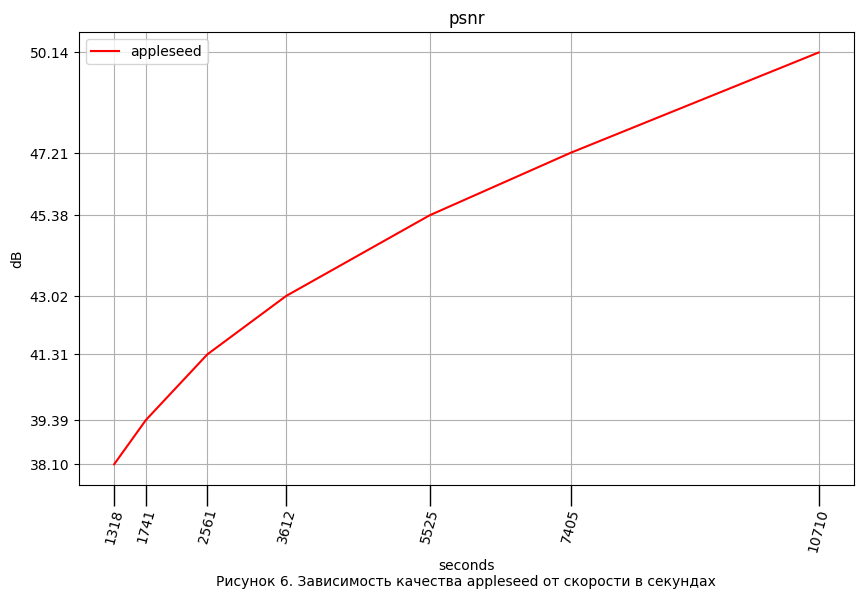

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.plot(B0_times, B0_psnr, color = 'r', label="appleseed")
plt.legend()
ax.set(title='psnr')

plt.xlabel("seconds\nРисунок 6. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей

plt.xticks(B0_times)
plt.ylabel("dB")
plt.yticks(B0_psnr)
#ax.yaxis.set_major_locator(ticker.IndexLocator(0, ))
plt.grid()

plt.show()

In [0]:

B1_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_1568,717.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_3109,822.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_6319,124.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_12627,391.png"]]
B1_times = [1568.717, 3109.822, 6319.124, 12627.391]
B1_psnr=[]
B1_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in B1_images:
  img = hisEqulColor(img)
  B1_psnr.append(measure.compare_psnr(Bimg, img, data_range=None))
  #B1_ssim.append(measure.compare_ssim(Bimg, img, multichannel=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


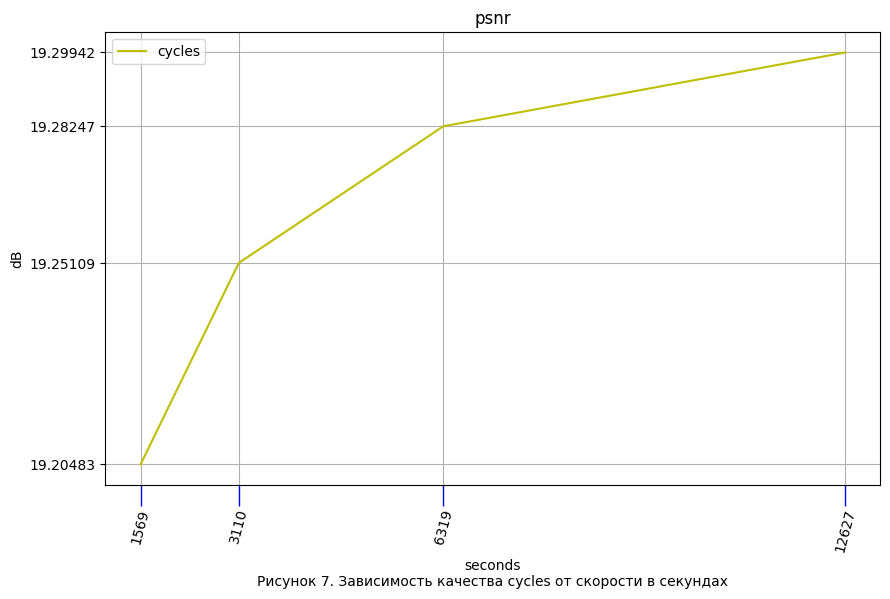

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(B1_times, B1_psnr, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds\nРисунок 7. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(B1_times)
plt.ylabel("dB")
plt.yticks(B1_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='ssim')
ax.plot(B1_times, B1_ssim, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(B1_times)
plt.ylabel("dB")
plt.yticks(B1_ssim)
plt.grid()

plt.show()

#LuxCore

In [0]:


B3_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles1/3_LuxCore/A3_1303,938.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/3_LuxCore/A3_2642,678.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/3_LuxCore/A3_5586,0458.png"]]
B3_times = [1303.938, 2642.678, 5586.0458]
B3_psnr=[]
B3_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in B3_images:
  img = hisEqulColor(img)
  B3_psnr.append(measure.compare_psnr(Bimg, img, data_range=None))
  #B3_ssim.append(measure.compare_ssim(Bimg, img, multichannel=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  if __name__ == '__main__':


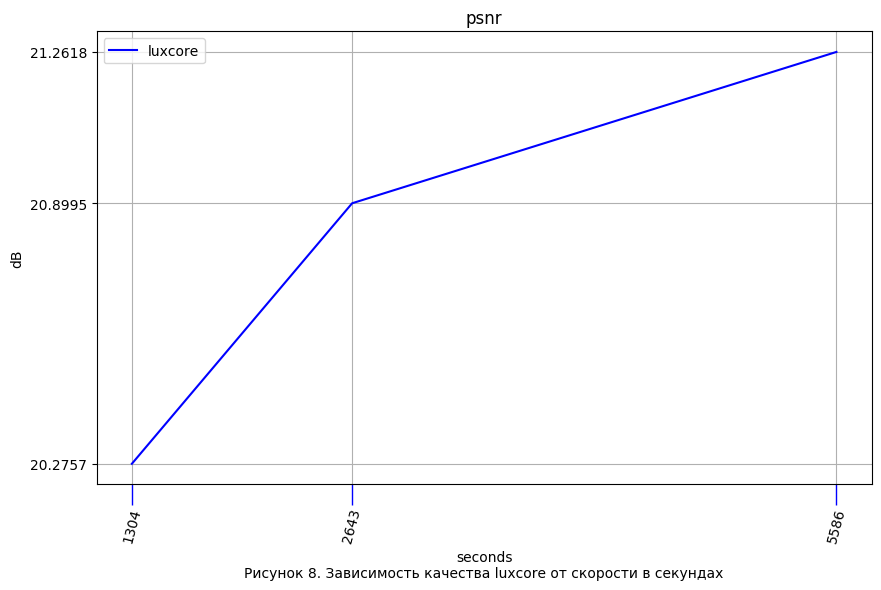

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(B3_times, B3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 8. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(B3_times)
plt.ylabel("dB")
plt.yticks(B3_psnr)
plt.grid()

plt.show()

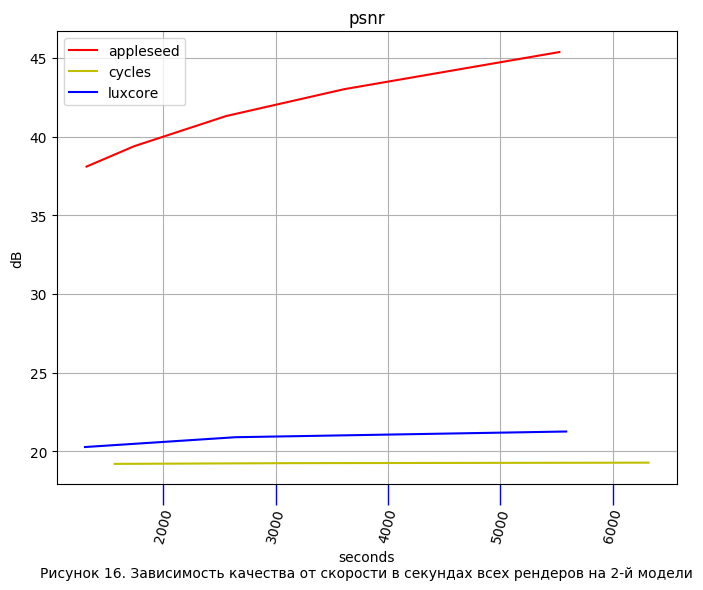

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(B0_times[:-2], B0_psnr[:-2], color = 'r', label="appleseed")
ax.plot(B1_times[:-1], B1_psnr[:-1], color = 'y', label="cycles")
ax.plot(B3_times, B3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 16. Зависимость качества от скорости в секундах всех рендеров на 2-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(B3_times)
plt.ylabel("dB")
#plt.yticks(B3_psnr)
plt.grid()

plt.show()

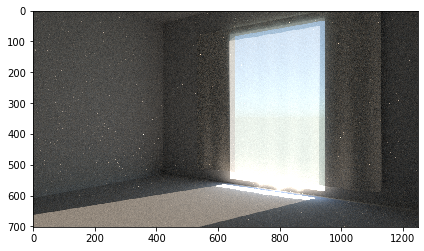

In [0]:
Cimg = imread("/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_9396.147.png")
Cimg = hisEqulColor(Cimg)
imshow(Cimg)

In [0]:
C0_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/c_exp_tranc_curt/0_appleseed/C2_1480.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/0_appleseed/C2_2916.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/0_appleseed/C2_5727.png" ]]

C0_times = [1480.167, 2916.739, 5727.149]
C0_psnr = []
C0_ssim = []

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C0_images:
  img = hisEqulColor(img)
  C0_psnr.append(measure.compare_psnr(Cimg, img, data_range=None))
  #C0_ssim.append(measure.compare_ssim(Cimg, img, multichannel=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  if sys.path[0] == '':


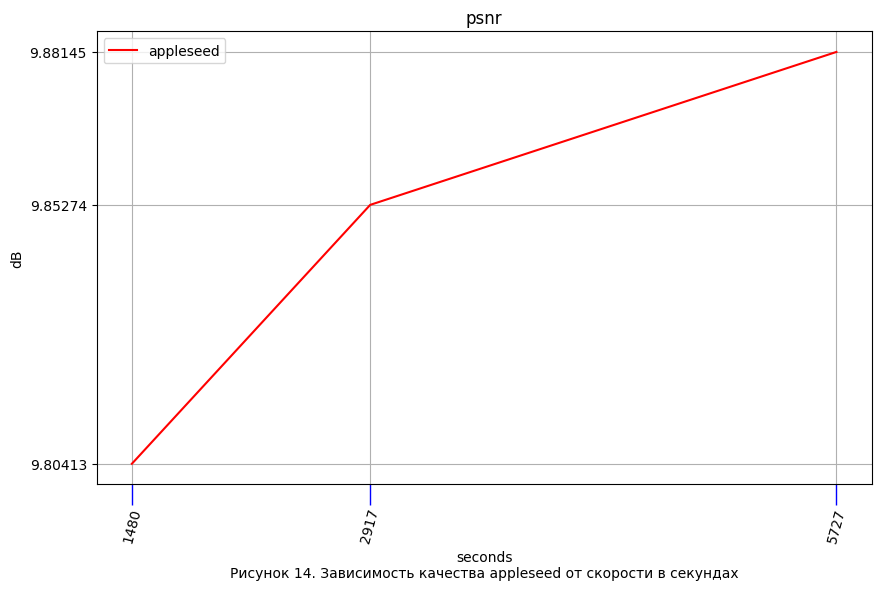

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
plt.legend()

plt.xlabel("seconds\nРисунок 14. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C0_times)
plt.ylabel("dB")
plt.yticks(C0_psnr)
plt.grid()

plt.show()

In [0]:
C1_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_625.035.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_ 1247.409.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_2507.067.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_5001.764.png"]] 

C1_times = [625.035, 1247.409, 2507.067, 5001.764]
C1_psnr=[]
C1_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C1_images:
  img = hisEqulColor(img)
  C1_psnr.append(measure.compare_psnr(Cimg, img, data_range=None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


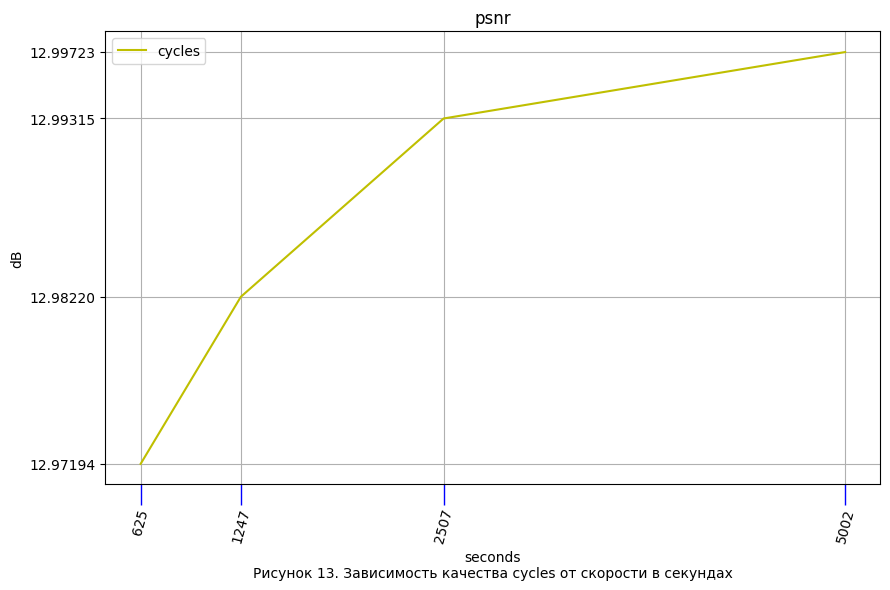

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds\nРисунок 13. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C1_times)
plt.ylabel("dB")
plt.yticks(C1_psnr)
plt.grid()

plt.show()

In [0]:

C3_images=[imread(i) for i in ["/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_1168.322.png", 
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_1714.233.png", 
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_2375.825.png",
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_4579.764.png",
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_6818.563.png"]] 

C3_times = [1168.322, 1714.233, 2375.825, 4579.764, 6818.563]
C3_psnr=[]
C3_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C3_images:
  img = hisEqulColor(img)
  C3_psnr.append(measure.compare_psnr(Cimg, img, data_range=None))

print(C3_psnr)

[23.785313018591072, 25.874990069108833, 27.583295546224157, 32.352229188243435, 36.69330888084331]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  from ipykernel import kernelapp as app


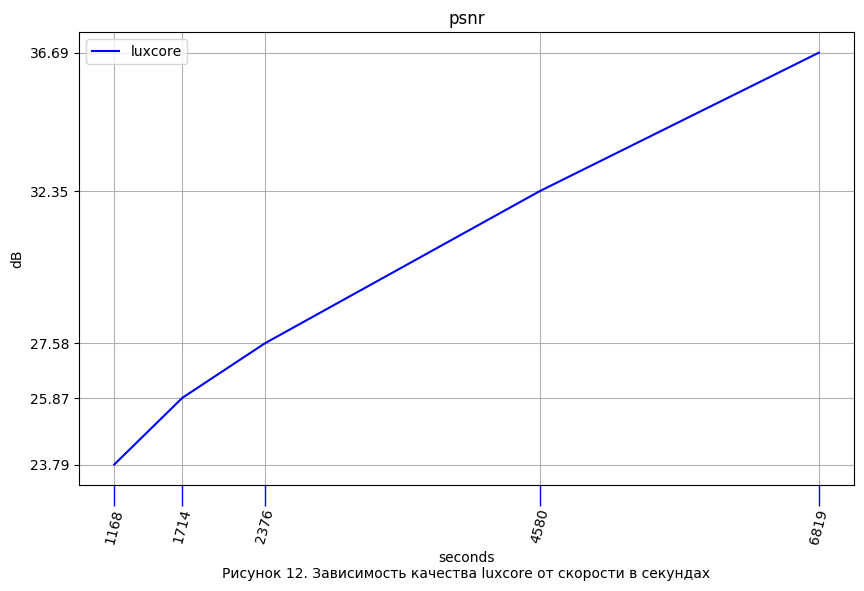

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 12. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C3_times)
plt.ylabel("dB")
plt.yticks(C3_psnr)
plt.grid()

plt.show()

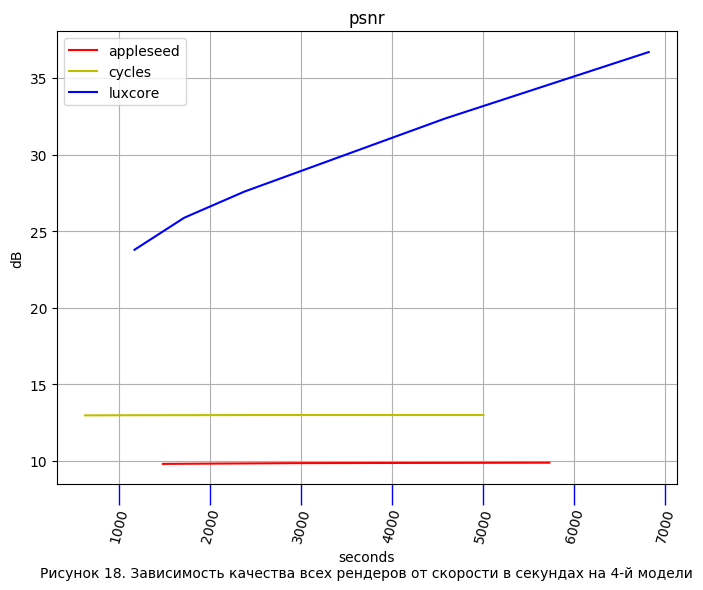

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 18. Зависимость качества всех рендеров от скорости в секундах на 4-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(B3_times)
plt.ylabel("dB")
#plt.yticks(B3_psnr)
plt.grid()

plt.show()

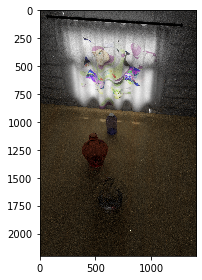

In [0]:
C2img = imread("/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_37625.399.png")
C2img = hisEqulColor(C2img)
imshow(C2img)

In [0]:

c0_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_1925.108.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_ 4815.922.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_6327.36.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_18980.577.png",
                                ]]

c0_times = [1925.108, 4815.922, 6327.36, 18980.577]
c0_psnr=[]
c0_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C0_images:
  img = hisEqulColor(img)
  C0_psnr.append(measure.compare_psnr(C2img, img, data_range=None))
  #C0_ssim.append(measure.compare_ssim(C2img, img, multichannel=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


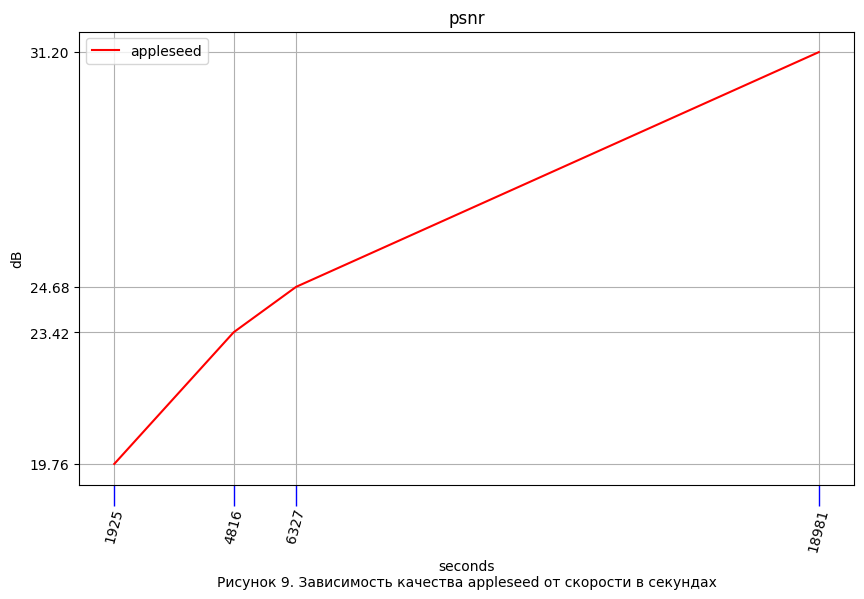

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
plt.legend()

plt.xlabel("seconds\nРисунок 9. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C0_times)
plt.ylabel("dB")
plt.yticks(C0_psnr)
plt.grid()

plt.show()

In [0]:
с3_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_1708.795.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_3649.661.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_ 7304.413.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_14741.714.png"]] 

с3_times = [1708.795, 3649.661, 7304.413, 14741.714]
с3_psnr=[]
с3_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C3_images:
  img = hisEqulColor(img)
  C3_psnr.append(measure.compare_psnr(C2img, img, data_range=None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


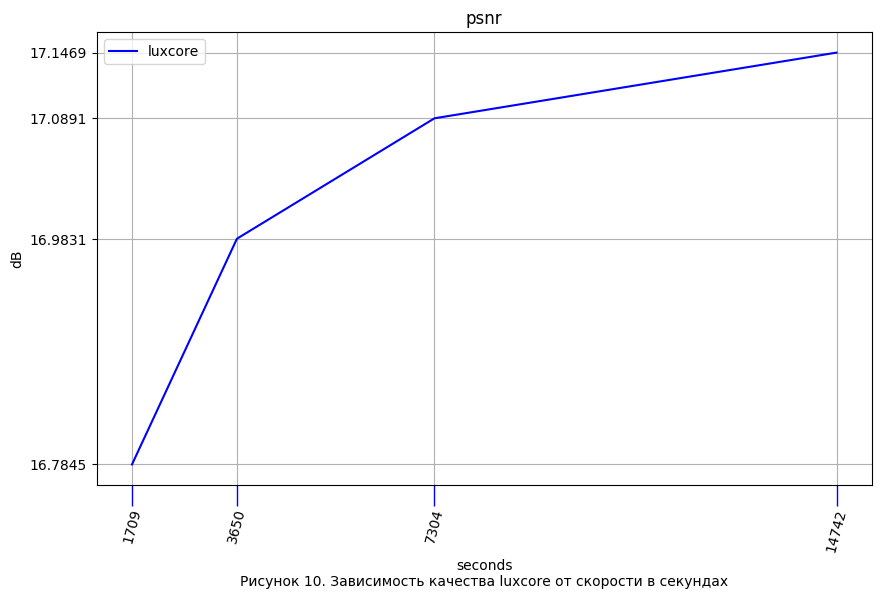

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 10. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C3_times)
plt.ylabel("dB")
plt.yticks(C3_psnr)
plt.grid()

plt.show()

In [0]:


с1_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_1889.7217.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_3800.386.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_7654.851.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_15177.85.png"]] 

с1_times = [1889.722, 3800.386, 7654.851, 15177.85]
C1_psnr=[]
C1_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C1_images:
  img = hisEqulColor(img)
  C1_psnr.append(measure.compare_psnr(C2img, img, data_range=None))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  


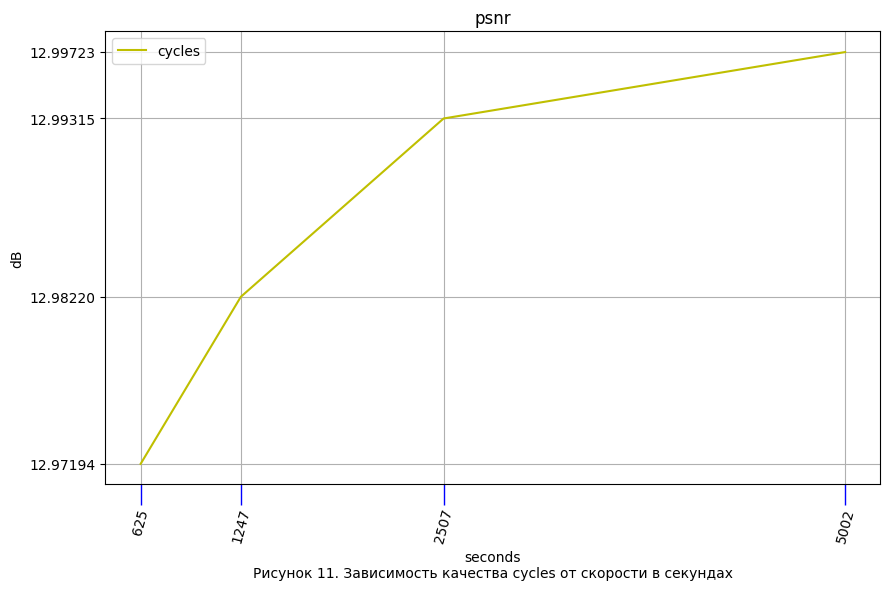

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds\nРисунок 11. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C1_times)
plt.ylabel("dB")
plt.yticks(C1_psnr)
plt.grid()

plt.show()

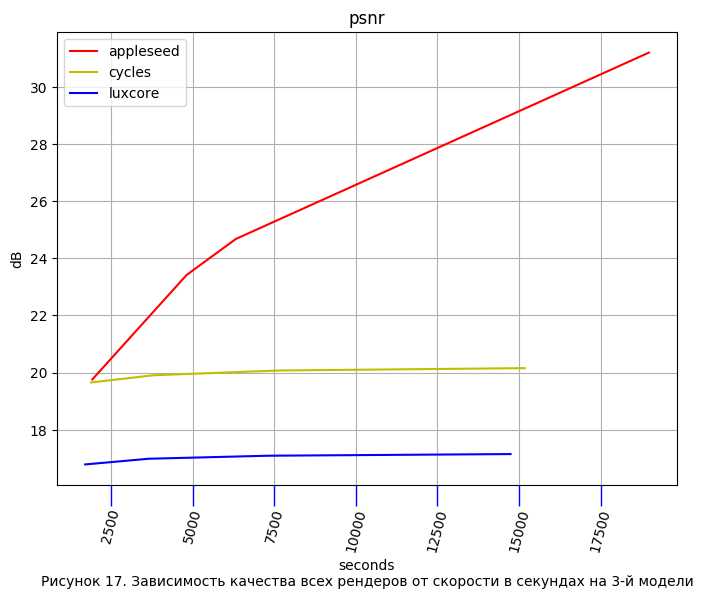

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 17. Зависимость качества всех рендеров от скорости в секундах на 3-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(B3_times)
plt.ylabel("dB")
#plt.yticks(B3_psnr)
plt.grid()

plt.show()